# An analysis of the Gadget HDF5 initial condition test

Begin with the usual imports

In [5]:
import os
import copy
import yaml
import time
import pyEXP
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from os.path import exists

plt.rcParams['figure.figsize'] = [12, 9]

### Switch to the working directory

In [6]:
os.chdir('/media/weinberg/Simulation data/Nbody/Sphere/RunG')

### Configure the basis

In [7]:
# Get the basis config
#
halo_config = """
id          : sphereSL
parameters  :
  numr      : 1000
  rmin      : 0.000011
  rmax      : 1.99
  Lmax      : 6
  nmax      : 18
  rs        : 0.05
  modelname : mw_halo.model
"""


# Construct the basis instance
#
halo_basis = pyEXP.basis.Basis.factory(halo_config)

---- SLGridSph::read_cached_table: trying to read cached table . . .
---- SLGridSph::read_cached_table: Success!!


### Read the coefficients

In [8]:
coefs = pyEXP.coefs.Coefs.factory('RunG_halo.h5')

### Check by making some surface renderings
Uses the final time slice but you could easily loop through all of them to make a movie, etc.

The coefficient time list is {} slices in [{}, {}] 286 0.03199983 9.56799984
Creating surfaces with times: [9.56799984]
Created fields instance
Created surfaces
We now have the following [time field] pairs
----------------------------------------
  9.5680  d
  9.5680  d0
  9.5680  d1
  9.5680  dd
  9.5680  fp
  9.5680  fr
  9.5680  ft
  9.5680  p
  9.5680  p0
  9.5680  p1


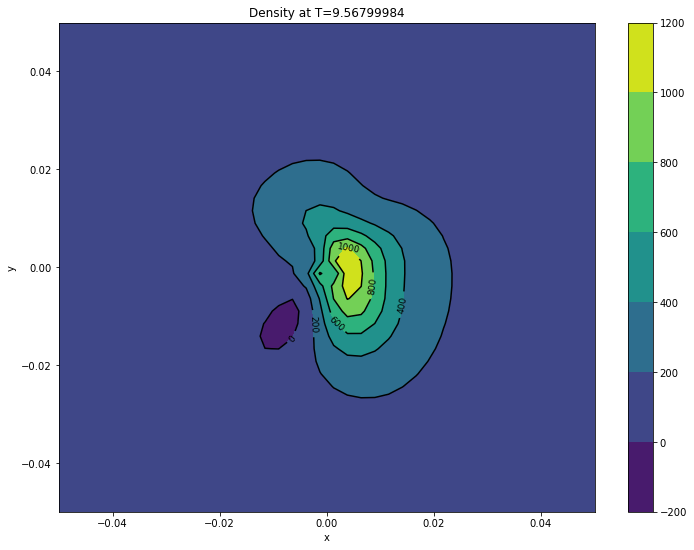

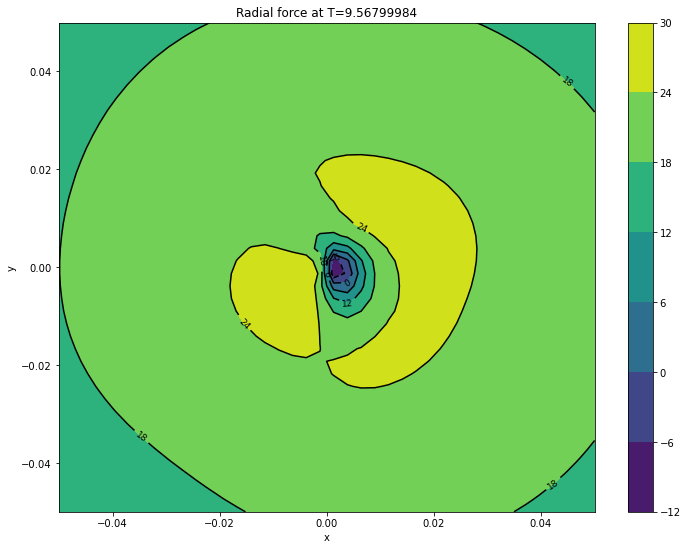

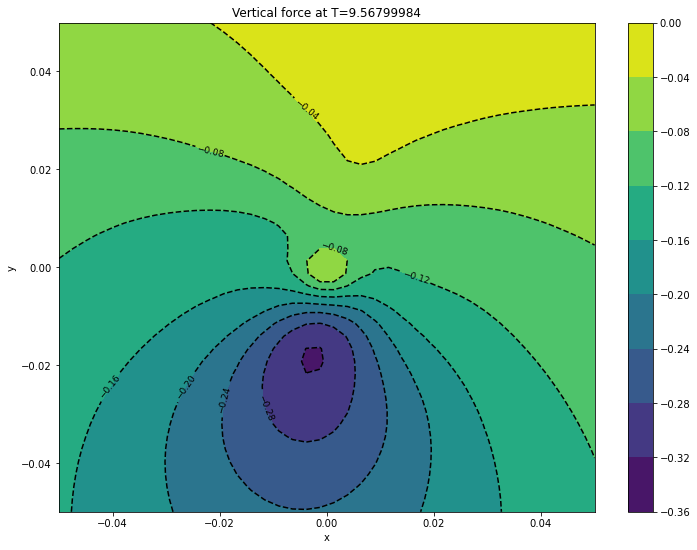

In [12]:
# Make the coefficients by the factory method
#

print('The coefficient time list is {} slices in [{}, {}]', len(coefs.Times()), coefs.Times()[0], coefs.Times()[-1])
#
times = coefs.Times()[-1:]
pmin  = [-0.05, -0.05, 0.0]
pmax  = [ 0.05,  0.05, 0.0]
grid  = [  40,   40,   0]

print('Creating surfaces with times:', times)

fields = pyEXP.field.FieldGenerator(times, pmin, pmax, grid)

print('Created fields instance')

surfaces = fields.slices(halo_basis, coefs)

print('Created surfaces')

print("We now have the following [time field] pairs")
final = 0.0
for v in surfaces:
    print('-'*40)
    for u in surfaces[v]:
        print("{:8.4f}  {}".format(v, u))
        final = v

# Print the potential image at the final time
# 
nx = surfaces[final]['d'].shape[0]
ny = surfaces[final]['d'].shape[1]

x = np.linspace(pmin[0], pmax[0], nx)
y = np.linspace(pmin[1], pmax[1], ny)
xv, yv = np.meshgrid(x, y)

# cont1 = plt.contour(xv, yv, surfaces[final]['d'].transpose(), colors='k', locator=ticker.LogLocator())
cont1 = plt.contour(xv, yv, surfaces[final]['d'].transpose(), colors='k')
plt.clabel(cont1, fontsize=9, inline=True)
# cont2 = plt.contourf(xv, yv, surfaces[final]['d'].transpose(), locator=ticker.LogLocator())
cont2 = plt.contourf(xv, yv, surfaces[final]['d'].transpose())
plt.colorbar(cont2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Density at T={}'.format(final))
plt.show()

cont1 = plt.contour(xv, yv, surfaces[final]['fr'].transpose(), colors='k')
plt.clabel(cont1, fontsize=9, inline=True)
cont2 = plt.contourf(xv, yv, surfaces[final]['fr'].transpose())
plt.colorbar(cont2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Radial force at T={}'.format(final))
plt.show()

cont1 = plt.contour(xv, yv, surfaces[final]['ft'].transpose(), colors='k')
plt.clabel(cont1, fontsize=9, inline=True)
cont2 = plt.contourf(xv, yv, surfaces[final]['ft'].transpose())
plt.colorbar(cont2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vertical force at T={}'.format(final))
plt.show()

### Plot some of the coefficients
Make two panels: one with the l=m=0 coefficients and one with some l>1 coefficients.

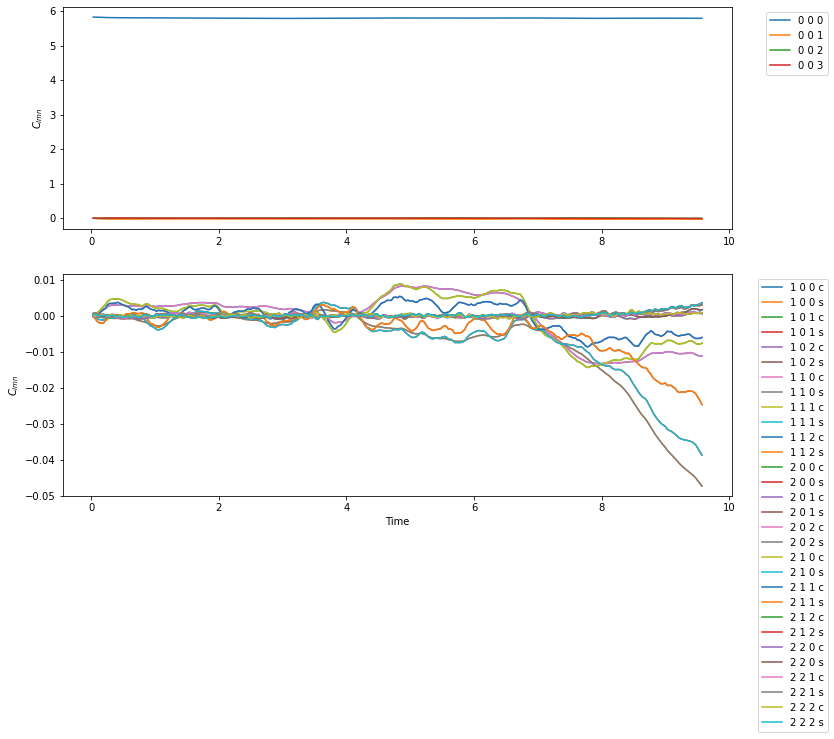

In [10]:
times = coefs.Times()
data  = coefs.getAllCoefs()

def I(l, m):
    return int(l*(l+1)/2) + 1

fig, ax = plt.subplots(2, 1)

for n in range(0, 4):
    ax[0].plot(times, np.real(data[0, n, :]), label='{} {} {}'.format(0, 0, n))
ax[0].set_ylabel(r'$C_{lmn}$')
ax[0].legend(bbox_to_anchor=(1.15, 1.0))

for l in range(1, 3):
    for m in range(0, l+1):
        for n in range(0, 3):
            ax[1].plot(times, np.real(data[I(l, m), n, :]), label='{} {} {} c'.format(l, m, n))
            ax[1].plot(times, np.imag(data[I(l, m), n, :]), label='{} {} {} s'.format(l, m, n))
ax[1].set_xlabel('Time')
ax[1].set_ylabel(r'$C_{lmn}$')
ax[1].legend(bbox_to_anchor=(1.15, 1.0))

plt.show()